In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 24s 97ms/step - loss: 0.2857 - accuracy: 0.9129 - val_loss: 0.1970 - val_accuracy: 0.9359
Epoch 2/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0997 - accuracy: 0.9696 - val_loss: 0.1650 - val_accuracy: 0.9487
Epoch 3/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0776 - val_accuracy: 0.9736
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0707 - val_accuracy: 0.9777
Epoch 5/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0603 - val_accuracy: 0.9824
Epoch 6/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.1013 - val_accuracy: 0.9696
Epoch 7/10
235/235 [==============================] - 7s 29ms/s

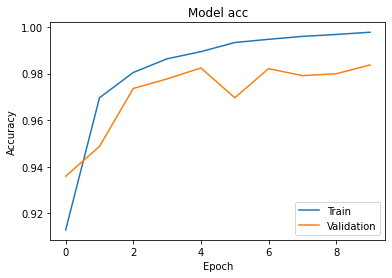

In [3]:
import matplotlib.pyplot as plt
# Plotting training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

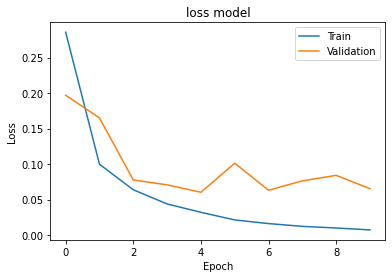

In [6]:
# Plotting training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#2 Plotting image

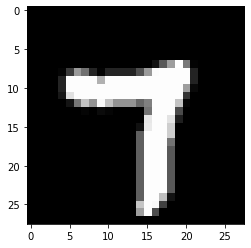

1/1 [==============================] - 0s 70ms/step
predicted image is: 7


In [10]:
# Selecting a random image from the test data
idx = np.random.randint(0, test_images.shape[0])
img = test_images[idx]

# Plot the selected image
plt.imshow(img, cmap='gray')
plt.show()

ipt_img = img.reshape(1, 784).astype('float32') / 255.0

pred = model.predict(ipt_img)
print('predicted image is:', np.argmax(pred))

In [8]:
#creating network
model_l = Sequential()
model_l.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_l.add(Dense(512, activation='tanh'))
model_l.add(Dense(256, activation='tanh'))
model_l.add(Dense(128, activation='tanh'))
model_l.add(Dense(10, activation='softmax'))

model_l.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 10s 41ms/step - loss: 0.3457 - accuracy: 0.8937 - val_loss: 0.2481 - val_accuracy: 0.9192
Epoch 2/10
235/235 [==============================] - 9s 40ms/step - loss: 0.1489 - accuracy: 0.9541 - val_loss: 0.1586 - val_accuracy: 0.9514
Epoch 3/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0977 - accuracy: 0.9699 - val_loss: 0.1617 - val_accuracy: 0.9490
Epoch 4/10
235/235 [==============================] - 9s 40ms/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0964 - val_accuracy: 0.9707
Epoch 5/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0938 - val_accuracy: 0.9710
Epoch 6/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0923 - val_accuracy: 0.9713
Epoch 7/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0654 - val_accuracy: 0.979